In [181]:
import numpy as np
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import math

In [182]:
def read_images(image_path):
    img = cv2.imread(image_path)
    rescaled_image  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)/255
    return rescaled_image

### Scale Space by increasing Sigma

In [238]:

def check_for_odd_sigma(sigma):
    return sigma if sigma%2 == 0 else sigma

def  generate_scale_space(image, initial_sigma, constant_multiplier, iterations):
    current_sigma = initial_sigma
    height = image.shape[0]
    width = image.shape[1]
    scale_space = np.empty((height, width, iterations))
    sigma_values = []
    for i in range(0, iterations):
        print(current_sigma)
        sigma_values.append(current_sigma)
        LoG_response = ndimage.gaussian_laplace(image, current_sigma)
        sigma_normalized_LoG =  np.square(current_sigma) * LoG_response
        scale_space[:,:,i] = np.square(sigma_normalized_LoG)
        current_sigma = check_for_odd_sigma(math.ceil(constant_multiplier * current_sigma))

    return scale_space, sigma_values

In [239]:
def supress_function(image_window):
    middle_index = math.floor(image_window.shape[0]/2)
    return image_window[middle_index] if image_window[middle_index] == np.max(image_window) else 0

def non_maximum_suppression(scale_space, window_size):
    suppressed_space = np.empty((scale_space.shape[0],scale_space.shape[1],scale_space.shape[2]))

    for i in range(scale_space.shape[2]):
        suppressed_space[:,:,i] = ndimage.generic_filter(scale_space[:,:,i],function=supress_function, footprint=np.ones((window_size,window_size)))
    return suppressed_space

In [240]:
def find_optimal_scale(scale_space):
    return np.argmax(scale_space, axis=2), np.amax(scale_space, axis=2)

In [360]:
constant_scale_factor = 1.25
initial_sigma = 2

scale_space, sigma_values = generate_scale_space( read_images('./hw3_images/butterfly.jpg'), initial_sigma, constant_scale_factor, 15 )

1
2
3
4
5
7
9
12
15
19
24
30
38
48
60


In [361]:
suppress_window = 25
suppressed_responses = non_maximum_suppression(scale_space, suppress_window)
maximum_sigma_by_axis, maximum_response = find_optimal_scale(suppressed_responses)

In [362]:
maximum_response

array([[0.06024631, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00032368, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00568509],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01036869, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00768055]])

In [363]:
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

In [364]:
rows, cols = np.nonzero(maximum_response)

In [368]:
sigmas = []
r = []
c = []
for i in range(len(rows)):
    exponent = maximum_sigma_by_axis[rows[i]][cols[i]]
    if maximum_response[rows[i]][cols[i]] >= 0.0009:
        sigmas.append( check_for_odd_sigma(math.ceil(pow(constant_scale_factor,exponent) * initial_sigma)) )
        r.append(rows[i])
        c.append(cols[i])

In [369]:
len(r)

1389

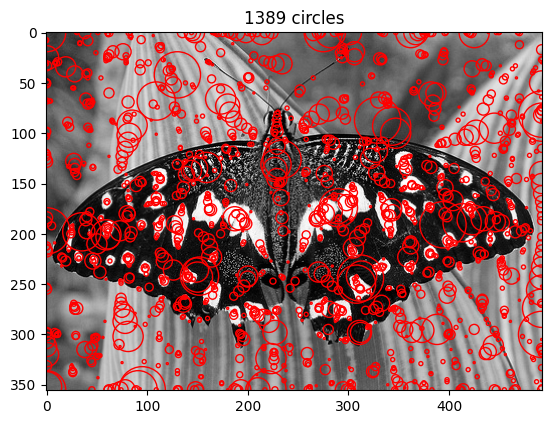

In [370]:
show_all_circles(read_images('./hw3_images/butterfly.jpg'), c, r, sigmas)

In [359]:
p = ndimage.filters.gaussian_laplace(sigmas=1)

/var/folders/w9/17dx1py559xc12bhjgp9w4_80000gn/T/ipykernel_1541/956276690.py:1: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  p = ndimage.filters.gaussian_laplace(sigmas=1)


TypeError: gaussian_laplace() missing 2 required positional arguments: 'input' and 'sigma'

In [93]:
sp = generate_scale_space( read_images('./hw3_images/butterfly.jpg'), 1.5, 1.5, 1 )

In [94]:
sp.shape

(356, 493, 1)

In [95]:
sp[:,:,0]

array([[2.35011662e-04, 1.98493769e-04, 1.00567725e-04, ...,
        4.93210160e-06, 1.52417004e-05, 3.80401216e-05],
       [2.85334835e-04, 1.50336546e-04, 2.68398248e-05, ...,
        3.63652665e-05, 3.88040961e-06, 4.60320482e-05],
       [4.36790258e-04, 1.52991965e-04, 6.10937163e-07, ...,
        1.25899522e-04, 2.68492589e-08, 6.51092291e-05],
       ...,
       [1.06606385e-04, 1.02089301e-04, 9.29216242e-05, ...,
        6.02843875e-04, 4.04585817e-06, 7.30120029e-04],
       [6.11016916e-05, 5.84219709e-05, 5.51878222e-05, ...,
        6.48341833e-04, 1.73054060e-05, 2.81850098e-04],
       [1.47290715e-07, 1.70557480e-07, 2.82345335e-06, ...,
        7.35532643e-04, 9.07976241e-05, 7.90740838e-05]])